# Домашнее задание 3. Алгоритмы кластеризации

Основная задача этого задания -- реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

Cчитываем данные, полученные в результате выполнения предыдущего домашнего задания, в `data frame` библиотеки `pandas`. Конвертируем данные в массив `numpy`.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt
import math
from copy import deepcopy

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data_df = pd.read_csv("hw2_out.csv", sep="\t", header=0, index_col="uid")
x = data_df.values


Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего логина на портале Техносферы.

In [8]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)", 
    u"OPTICS. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[hash("na.porfireva") % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm


Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [5]:
class Clustering:
    """
    Implement clustering algorithm according 
    
    """
    objects=[]
    Clusters=[]
    k=0
    linkage=0
    qual=[]
    x_len=0
    distance=[]
    result_Clusters=[]
    counts=0
    def __init__(self,number_of_clusters, dist,x,coun):
        """
        Please add necessary algoritm parameters to class constructor.
       
        """
        self.counts=coun
        self.objects=[]
        self.distance=[]
        self.k=number_of_clusters
        self.linkage=dist
        self.qual=[]
        self.result_Clusters=[]
        self.Clusters=[]
        for i in xrange(0, len(x[:,0])):
            temp=[]
            self.objects.append(x[i,:])
            temp.append(i)
            self.Clusters.append(temp)
        temp=[]
        for i in  xrange(0,len(self.objects)):
            temp=[]
            for j in  xrange(0,len(self.objects)):    
                temp.append(self.norm2(self.objects[i],self.objects[j]))
            self.distance.append(temp)
            
        return
    def norm2(self,x,y):
        result=0
        for i in xrange(0,len(x)):
            result=result+math.fabs(x[i]-y[i])
        return result
    def norm3(self,x,y):
        maxim=0
        for i in xrange(0,len(x)):
            if math.fabs(x[i]-y[i])>maxim:
                maxim=math.fabs(x[i]-y[i])
        return maxim
    def norm(self,x,y):
        result=0
        for i in xrange(0,len(x)):
            result=result+(x[i]-y[i])**2.0
        result=math.sqrt(result)
        return result
    def norm4(self,x,y,k):
        result=0
        
        for i in xrange(0,len(x)):
            result=result+math.fabs((x[i]-y[i]))**(k)
        result=(math.fabs(result))**(1.0/k)
     
        return result
    def distan(self,x,y):
        if (self.linkage==0):           
            minimum=inf
            for i in x:
                for j in y:
                    if self.distance[i][j]<minimum:
                        minimum=self.distance[i][j]
            return minimum
        if (self.linkage==1):
            result=0
            maximum=0
            for i in x:
                for j in y:
                    if self.distance[i][j]>maximum:
                        maximum=self.distance[i][j]
            return maximum
        if (self.linkage==2):
            
            result=0
            res=0
            for i in x:
                for j in y:
                    res=res+self.distance[i][j]
                  
            result=res/(len(x)*len(y))
            return result
        
    def merge(self,x,y):
        self.Clusters[x] += self.Clusters[y] 
        self.Clusters.pop(y)
        return
    def quality(self,x):
        maxim=0
        maximum=0
    
        for i in x:
            
            maxim=0
            
            for j in i:
                for k in i:
                    temp=self.distance[j][k]
                    
                    if temp>maxim:
                        maxim=temp
            maximum=maximum+maxim
        result=maximum/len(x)
        
        return result
 
    def qity(self,x):
        return x
        
    def fit(self):
        """
        Use data matrix x to compute model parameters
        """
        
        self.qual=[]
        temp=[]
        C=len(self.Clusters)
        while (C>self.k):
            
            print C
            
            
            obj1=-1
            obj2=-1
            minim=inf
            for i in xrange(0,len(self.Clusters)):
                for j in xrange(i+1,len(self.Clusters)):
                    d=self.distan(self.Clusters[i],self.Clusters[j])
                    
                    if d<minim:
                        obj1=i
                        obj2=j                    
                        minim=d
                                    
            
            self.merge(obj1,obj2)
           
            #del(Clusters[obj2])
            C=C-1 
            #print self.result_Clusters print self.rcls
            
            if (C<self.counts ):
                self.qual.append(self.quality(self.Clusters))               
                self.result_Clusters.append(deepcopy(self.Clusters))
                
                #self.rcls.append(temp)
                
                
                             
        self.qual=list(reversed(self.qual))
        self.result_Clusters=list(reversed(self.result_Clusters))
        self.x_len = len(x)
        result=[]
        
        for i in xrange(0,len(self.objects)):
            p=0
            for j in xrange(0,len(self.Clusters)):
                for k in self.Clusters[j]:
                    if (i==k):
                    ##if (self.objects[i] == k).all():
                        if p==0:
                            result.append(j)
                            p=p+1
        
        
        

        return result
    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        return [random.randint(0,1) for r in xrange(self.x_len)]
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]
print "kachestvo"
a=Clustering(2,2,x_iris,10)
y=a.fit()
print y
print len(a.result_Clusters)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris,y )
#a.fit(x_iris)
#print len(a.qual)
#m=Clustering(2,2,x,18)

#z=m.fit()
#print m.result_Clusters[15]

kachestvo
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
8
Adjusted Rand index for iris is: 1.00


Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

2
stresultart
1500
1499
1498
1497
1496
1495
1494
1493
1492
1491
1490
1489
1488
1487
1486
1485
1484
1483
1482
1481
1480
1479
1478
1477
1476
1475
1474
1473
1472
1471
1470
1469
1468
1467
1466
1465
1464
1463
1462
1461
1460
1459
1458
1457
1456
1455
1454
1453
1452
1451
1450
1449
1448
1447
1446
1445
1444
1443
1442
1441
1440
1439
1438
1437
1436
1435
1434
1433
1432
1431
1430
1429
1428
1427
1426
1425
1424
1423
1422
1421
1420
1419
1418
1417
1416
1415
1414
1413
1412
1411
1410
1409
1408
1407
1406
1405
1404
1403
1402
1401
1400
1399
1398
1397
1396
1395
1394
1393
1392
1391
1390
1389
1388
1387
1386
1385
1384
1383
1382
1381
1380
1379
1378
1377
1376
1375
1374
1373
1372
1371
1370
1369
1368
1367
1366
1365
1364
1363
1362
1361
1360
1359
1358
1357
1356
1355
1354
1353
1352
1351
1350
1349
1348
1347
1346
1345
1344
1343
1342
1341
1340
1339
1338
1337
1336
1335
1334
1333
1332
1331
1330
1329
1328
1327
1326
1325
1324
1323
1322
1321
1320
1319
1318
1317
1316
1315
1314
1313
1312
1311
1310
1309
1308
1307
1306
1305
1304
1

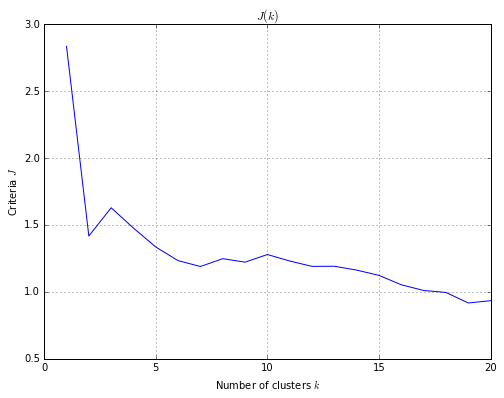

In [6]:
#iris = ds.load_iris()
#x_iris = iris.data[:100]
#y_iris = iris.target[:100]

#pl.figure(figsize=(10, 5))

#pl.subplot(1, 2, 1)
#pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
#plt.xlabel('Sepal length')
#plt.ylabel('Sepal width')

#pl.subplot(1, 2, 2)
#pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
#plt.xlabel('Petal length')
#plt.ylabel('Petal width')
b=Clustering(1,2,x[:1500],21)
print b.linkage
print "stresultart"
y=b.fit()
ks = range(1, 21)
criteria=b.qual
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()




#b=Clustering(6,2,x[0:300])
#print "start"
#y = b.fit()
#print b.Clusters

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [7]:
print "kachestvo"
c=Clustering(1,2,x)
print c.linkage
print "stresultart"
y=c.fit()
print c.result_Clusters[5]
#pred_iris = Clustering(2,10).fit(x_iris)
 
#print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

kachestvo


TypeError: __init__() takes exactly 5 arguments (4 given)

Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [53]:
print c.result_Clusters[15]
for i in xrange (0,15):
    print len(c.result_Clusters[14][i])
#pred_iris = Clustering(2,0).fit(x_iris)
#print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)
#print (time.time()-t1)
y=c.result_Clusters[14]
result=[]
for i in xrange(0,len(c.objects)):
            p=0
            for j in xrange(0,len(c.result_Clusters[14])):
                for k in c.result_Clusters[14][j]:
                    if (i==k):
                    ##if (self.objects[i] == k).all():
                        if p==0:
                            result.append(j)
                            p=p+1
        
        
for i in xrange(0,len(result)):  
    if result[i]==0:
        result[i]=result[i]+4
    if result[i]==1:
        result[i]=result[i]+8
    if result[i]==2:
        result[i]=result[i]+12
print result
def quality(x, y):
    """
    Implement quality criterion of your choice
    """
    return 0.51

[[0, 2897, 1172, 211, 339, 2625, 2969, 1241, 1523, 1113, 2812, 278, 650, 1636, 636, 1671, 2818, 2223, 2230, 1082, 1275, 1099, 2231, 565, 1431, 2232, 1623, 2837, 1191, 1441, 1832, 554, 1709, 2215, 1599, 2484, 981, 2, 2257, 220, 2430, 1520, 2697, 2774, 912, 1481, 2049, 2084, 284, 878, 2691, 2211, 169, 2744, 1122, 1281, 287, 1392, 728, 874, 1958, 2067, 118, 704, 4, 506, 47, 2788, 982, 2120, 59, 548, 109, 2090, 2889, 816, 2589, 1020, 2552, 1299, 136, 578, 1183, 2136, 311, 1258, 1979, 1810, 530, 1559, 2945, 200, 1738, 2940, 1870, 2051, 2160, 2912, 1271, 1279, 1402, 2706, 1963, 2569, 1199, 1234, 1004, 1942, 1685, 1746, 640, 1784, 2567, 2807, 805, 1331, 2908, 1898, 2841, 1314, 1527, 850, 2773, 2883, 1733, 1027, 1531, 2009, 2986, 2390, 23, 353, 641, 371, 2528, 1455, 2959, 552, 79, 513, 2943, 1562, 2787, 1851, 522, 604, 2761, 238, 1716, 824, 977, 440, 1347, 186, 1670, 251, 65, 1085, 1026, 1439, 2647, 1412, 115, 1237, 1153, 2172, 130, 357, 587, 1872, 1373, 1993, 2530, 510, 2494, 2498, 2925, 1367

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

[[ 0.51718879  0.64162231  0.8411335  ...,  0.11111111  0.41666667
   0.94512195]
 [ 0.44666944  0.53016124  0.46334552 ...,  0.11111111  0.66666667
   0.4695122 ]
 [ 0.49231027  0.38942644  0.75839304 ...,  0.22222222  0.16666667
   0.33536585]
 ..., 
 [ 0.36187343  0.4235029   0.53292336 ...,  0.11111111  1.          0.66463415]
 [ 0.33184422  0.50583501  0.45267986 ...,  0.          0.91666667
   0.81097561]
 [ 0.37363973  0.43116275  0.62124009 ...,  0.11111111  0.41666667
   0.15243902]]
start
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
19


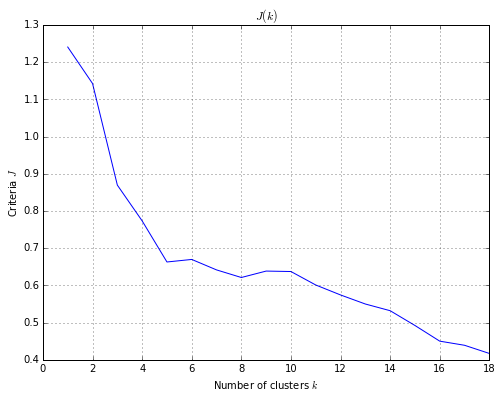

In [46]:
#ks = range(1, 21)
#criteria = np.zeros(len(ks))
print x
cls = Clustering(1,2)
y = cls.fit(x[0:100])
ks = range(1, 19)
criteria = np.zeros(len(ks))
criteria=cls.qual
print len(criteria)
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria[1:19])
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()
#k = 5
#for i, k in enumerate(ks):
#    cls = Clustering()
#    y = cls.fit_predict(x)
#    criteria[i] = quality(x, y)
    
#pl.figure(figsize=(8, 6))
#pl.plot(ks, criteria)
#pl.title("$J(k)$")
#pl.ylabel("Criteria $J$")
#pl.xlabel("Number of clusters $k$")
#pl.grid()
#pl.show()

Далее необходимо кластеризовать данные, используя выбранное количество кластеров, и визуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время. 

In [64]:

print len(x)
clusters = np.unique(result)
print clusters
#k = 5
#cls = Clustering()
#y = cls.fit_predict(x)

2999
[0 1 2 3]


Визуализируем результаты кластеризации ([подсказка](http://anokhin.github.io/img/hw3_tsne-kmeans.png)). Можно ли сказать, что в двумерном пространстве объекты из одного кластера находятся недалеко? Какой вывод можно сделать о качестве кластеризации?

stresultart
[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 2999
[t-SNE] Computed conditional probabilities for sample 2000 / 2999
[t-SNE] Computed conditional probabilities for sample 2999 / 2999
[t-SNE] Mean sigma: 0.137846
[t-SNE] Error after 83 iterations with early exaggeration: 19.930942
[t-SNE] Error after 321 iterations: 2.133794


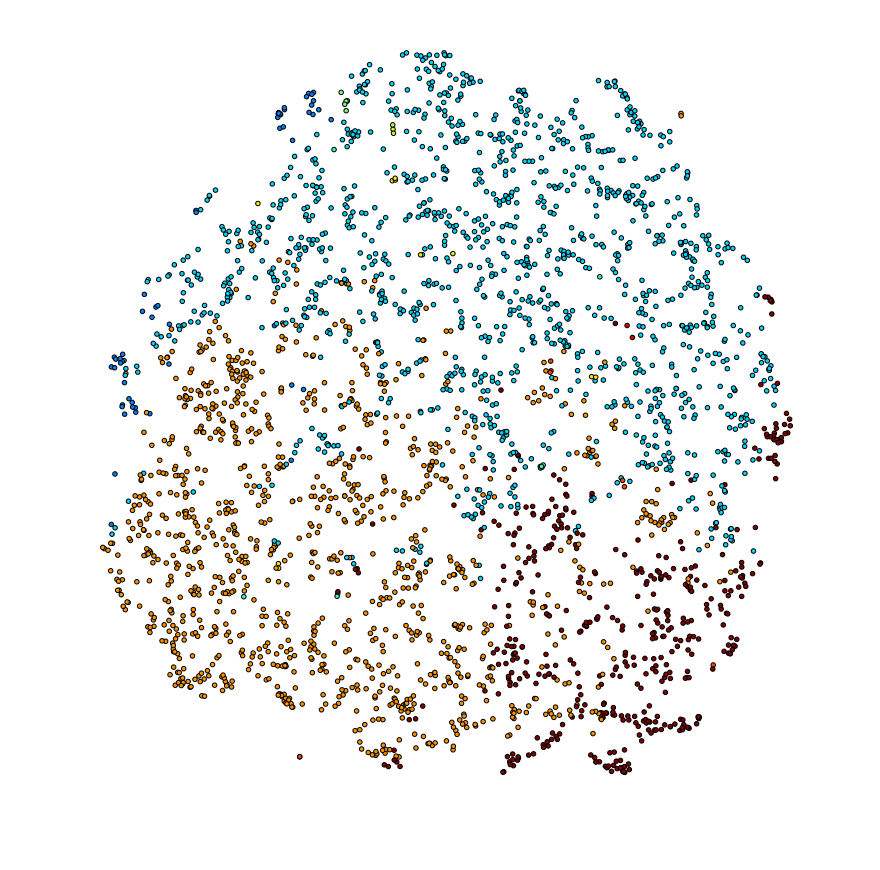

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [54]:

print "stresultart"
k=12
tsne = sm.TSNE(n_components=2, verbose=1, n_iter=1000)
z = tsne.fit_transform(x)


# Color map
cm = pl.get_cmap('jet')
pl.figure(figsize=(15, 15))
pl.scatter(z[:, 0], z[:, 1], c=map(lambda c: cm(1.0 * c / k),result))
pl.axis('off')
pl.show()
print h.fit()

Попробуем проанализировать полученные кластеры. Для того, чтобы интерпретировать "суть" каждого из кластеров, построим [radar plot](http://www.wikiwand.com/en/Radar_chart), отображающий их центроиды. Посмотрите на графики и попробуйте объяснить, каким поведением можно охарактеризовать каждый из полученных кластеров? Есть ли среди кластеров похожие?

Реализация радара позаимствована отсюда: 
http://www.science-emergence.com/Matplotlib/MatplotlibGallery/RadarChartMatplotlibRougier/

[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 3, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 2, 3, 1, 0, 3, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3, 2, 0, 0, 1, 0, 2, 0, 1, 3, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 3, 0, 1, 0, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 

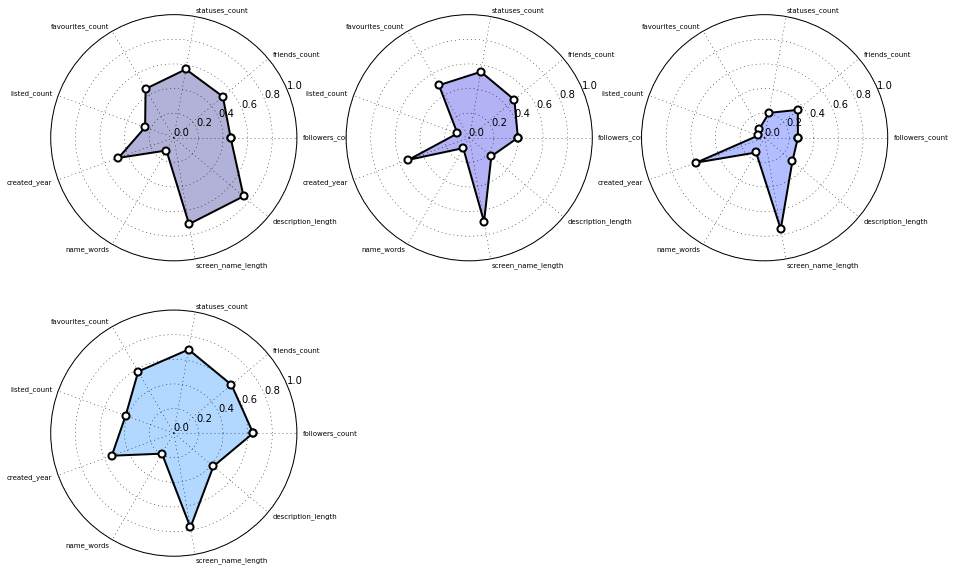

In [62]:
for i in xrange(0,len(result)):  
    if result[i]!=4 and result[i]!=9 and result[i]!=14 :
        result[i]=3
for i in xrange(0,len(result)):  
    if result[i]==4:
        result[i]=0
    if result[i]==9:
        result[i]=1
    if result[i]==14:
        result[i]=2
print result
def radar(centroid, features, axes, color):
    # Set ticks to the number of features (in radians)
    t = np.arange(0, 2*np.pi, 2*np.pi/len(features))
    plt.xticks(t, [])

    # Set yticks from 0 to 1
    plt.yticks(np.linspace(0, 1, 6))

    # Draw polygon representing centroid
    points = [(x, y) for x, y in zip(t, centroid)]
    points.append(points[0])
    points = np.array(points)
    codes = [path.Path.MOVETO,] + [path.Path.LINETO,] * (len(centroid) - 1) + [ path.Path.CLOSEPOLY ]
    _path = path.Path(points, codes)
    _patch = patches.PathPatch(_path, fill=True, color=color, linewidth=0, alpha=.3)
    axes.add_patch(_patch)
    _patch = patches.PathPatch(_path, fill=False, linewidth = 2)
    axes.add_patch(_patch)

    # Draw circles at value points
    plt.scatter(points[:,0], points[:,1], linewidth=2, s=50, color='white', edgecolor='black', zorder=10)

    # Set axes limits
    plt.ylim(0, 1)

    # Draw ytick labels to make sure they fit properly
    for i in range(len(features)):
        angle_rad = i/float(len(features))*2*np.pi
        angle_deg = i/float(len(features))*360
        ha = "right"
        if angle_rad < np.pi/2 or angle_rad > 3*np.pi/2: ha = "left"
        plt.text(angle_rad, 1.05, features[i], size=7, horizontalalignment=ha, verticalalignment="center")

# Some additiola imports
import matplotlib
import matplotlib.path as path
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Choose some nice colors
matplotlib.rc('axes', facecolor = 'white')
# Make figure background the same colors as axes 
fig = plt.figure(figsize=(15, 15), facecolor='white')

cm = pl.get_cmap('jet')

clusters = np.unique(result)
print clusters
for j, cluster in enumerate(clusters):    
    x_c = x[result == cluster]
    centroid = x_c.mean(axis=0)    
    # Use a polar axes
    axes = plt.subplot(3, 3, j + 1, polar=True)
    radar(centroid, data_df.columns.values, axes, cm(1.0 * j / k))

plt.show()

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.